In [129]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


准备训练接，验证集和测试集

In [11]:
train_file = ["2010.csv", "2011.csv", "2012.csv", "2013.csv", "2014.csv"]

In [12]:
features = ['Capitalization', 'CirculatingCap','CirculatingMarketCap', 'MarketCap', 'PBRatio', 'PCFRatio', 'PSRatio','PeRatio', 'PeRatioLYR', 'TurnoverRatio']

In [13]:
data = pd.read_csv("../stock_data/train_data/2010.csv", index_col="index")

In [14]:
train_data_sorted = data.sort_values(by = "rf", ascending=False)

In [15]:
long_set_train = train_data_sorted.iloc[:int(train_data_sorted.shape[0]*0.3), :]
long_set_train["rf"] = 2
plain_set_train = train_data_sorted.iloc[int(train_data_sorted.shape[0]*0.3):int(train_data_sorted.shape[0]*0.7), :]
plain_set_train["rf"] = 1
short_set_train = train_data_sorted.iloc[int(train_data_sorted.shape[0]*0.7):, :]
short_set_train["rf"] = 0
train_data =long_set_train.append(short_set_train)

/tmp/ipykernel_27470/2475148955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_set_train["rf"] = 2
/tmp/ipykernel_27470/2475148955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plain_set_train["rf"] = 1
/tmp/ipykernel_27470/2475148955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [16]:
for file in train_file[1:]:
    data = pd.read_csv(f"../stock_data/train_data/{file}", index_col="index")
    train_data_sorted = data.sort_values(by = "rf", ascending=False)
    long_set = train_data_sorted.iloc[:int(train_data_sorted.shape[0]*0.3), :]
    long_set["rf"] = 2
    plain_set = train_data_sorted.iloc[int(train_data_sorted.shape[0]*0.3):int(train_data_sorted.shape[0]*0.7), :]
    plain_set["rf"] = 1 
    short_set = train_data_sorted.iloc[int(train_data_sorted.shape[0]*0.7):, :]
    short_set["rf"] = 0
    train_set =long_set.append(short_set)
    train_data = train_data.append(train_set)

/tmp/ipykernel_27470/842615516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_set["rf"] = 2
/tmp/ipykernel_27470/842615516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plain_set["rf"] = 1
/tmp/ipykernel_27470/842615516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [17]:
test_data = pd.read_csv(f"../stock_data/train_data/2015.csv", index_col="index")
test_data_sorted = data.sort_values(by = "rf", ascending=False)
long_set_test = test_data_sorted.iloc[:int(test_data_sorted.shape[0]*0.3), :]
long_set_test["rf"] = 2
plain_set_test = test_data_sorted.iloc[int(test_data_sorted.shape[0]*0.3):int(test_data_sorted.shape[0]*0.7), :]
plain_set_test["rf"] = 1
short_set_test = test_data_sorted.iloc[int(test_data_sorted.shape[0]*0.7):, :]
short_set_test["rf"] = 0
test_data =long_set_test.append(short_set_test)

/tmp/ipykernel_27470/2280955215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_set_test["rf"] = 2
/tmp/ipykernel_27470/2280955215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plain_set_test["rf"] = 1
/tmp/ipykernel_27470/2280955215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [18]:
# 加载样本数据集，划分训练集，测试集
X_train_set = train_data[features]
y_train_set = train_data["rf"]
X_train, X_val, y_train, y_val = train_test_split(X_train_set, y_train_set, test_size=0.1, random_state=1234565)
X_test = test_data[features]
y_test = test_data["rf"]

In [19]:
# 数据集格式转换
dtrain = xgb.DMatrix(X_train, y_train, feature_names=features)
dval = xgb.DMatrix(X_val, feature_names=features)

In [108]:
# 训练算法参数设置
params = {
    # 通用参数
    'booster': 'gbtree', # 使用的弱学习器,有两种选择gbtree（默认）和gblinear,gbtree是基于
                        # 树模型的提升计算，gblinear是基于线性模型的提升计算
    # 'nthread' XGBoost运行时的线程数，缺省时是当前系统获得的最大线程数
    'silent':0, # 0：表示打印运行时信息，1：表示以缄默方式运行，默认为0
    'num_feature':10, # boosting过程中使用的特征维数
    'seed': 1000, # 随机数种子
    # 任务参数
    'objective': 'multi:softmax', # 多分类的softmax,objective用来定义学习任务及相应的损失函数
    'num_class': 3, # 类别总数
    # 提升参数
    'gamma': 0.1, # 叶子节点进行划分时需要损失函数减少的最小值
    'max_depth': 100, # 树的最大深度，缺省值为6，可设置其他值
    'lambda': 2, # 正则化权重
    'subsample': 0.7, # 训练模型的样本占总样本的比例，用于防止过拟合
    'colsample_bytree': 0.7, # 建立树时对特征进行采样的比例
    'min_child_weight': 3, # 叶子节点继续划分的最小的样本权重和
    'eta': 0.1, # 加法模型中使用的收缩步长   
    
}

max_depth_set = [8,9,10,11,12,13]
subsample_set = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

In [109]:
heap_fig = pd.DataFrame(columns=["sub", 8,9,10,11,12,13])

In [110]:
heap_fig["sub"]=subsample_set

采用k-flod交叉验证，调整研报中指出的两种超参数

In [111]:
# 进行网格搜索,交叉验证
num_rounds = 50
for max_depth in max_depth_set:
    for subsample in subsample_set: 
        print(f"max_depth = {max_depth}, subsample_set = {subsample}")
        params["max_depth"] = max_depth
        params["subsample_set"] = subsample
        plst = list(params.items())
        xgb_clf = xgb.train(plst, dtrain, num_rounds)
        y_pred = xgb_clf.predict(dval)
        accuracy = accuracy_score(y_val,y_pred)
        print("accuarcy: %.2f%%" % (accuracy*100.0))
        heap_fig.loc[heap_fig["sub"]==subsample, max_depth] = round(accuracy*100, 2)

max_depth = 8, subsample_set = 0.7
[20:39:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1631904754241/work/src/learner.cc:573: 
Parameters: { "silent", "subsample_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:39:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1631904754241/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuarcy: 60.73%
max_depth = 8, subsample_set = 0.75
[20:39:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1631904754241/work/src/learner.cc:573: 
Parameters: { "silent", "subsample_set" } might not 

In [112]:
heap_fig.set_index("sub")

,8,9,10,11,12,13
sub,,,,,,
0.70,60.73,61.45,60.8,60.87,60.76,59.76
0.75,60.73,61.45,60.8,60.87,60.76,59.76
0.80,60.73,61.45,60.8,60.87,60.76,59.76
0.85,60.73,61.45,60.8,60.87,60.76,59.76
0.90,60.73,61.45,60.8,60.87,60.76,59.76
0.95,60.73,61.45,60.8,60.87,60.76,59.76
1.00,60.73,61.45,60.8,60.87,60.76,59.76


选择验证集正确率最高的一组超参数，重新训练模型并保存。计算该模型在测试集中的准确率。

In [113]:
# 选择最优的一组超参数
params["max_depth"] = 11
params["subsample_set"] = 1
plst = list(params.items())
xgb_clf = xgb.train(plst, dtrain, num_rounds)


[20:41:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1631904754241/work/src/learner.cc:573: 
Parameters: { "silent", "subsample_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:41:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1631904754241/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
dtest = xgb.DMatrix(X_test, feature_names=features)

In [117]:
y_pred = xgb_clf.predict(dtest)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 80.04%


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


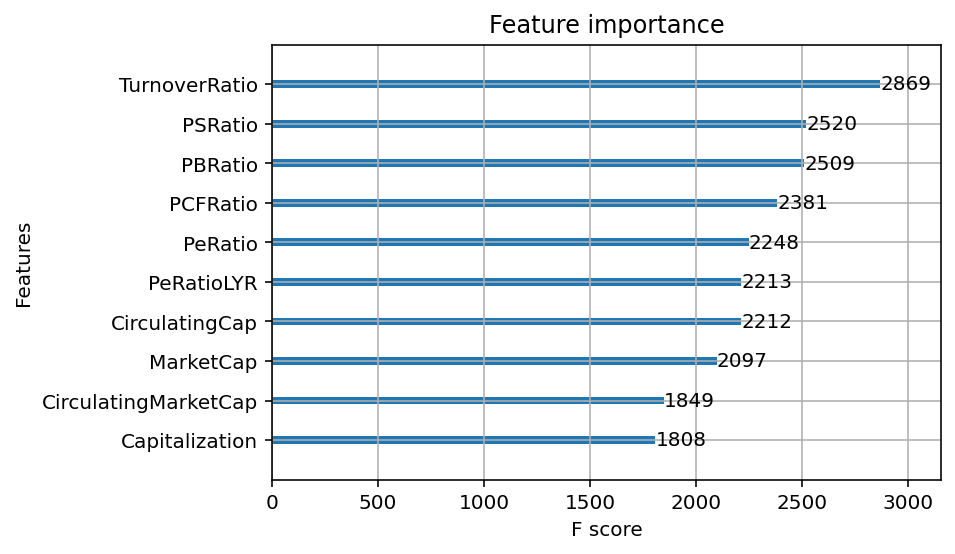

In [118]:
# 显示重要特征
plot_importance(xgb_clf)
plt.show()

In [127]:
# 保存模型
xgb_clf.save_model("model_set/xgb-2010-2014.json")

同理可训练出其他回测区间中的“最优”模型，由于时间原因，后续模型均采用第一个回测区间的最优超参数，训练脚本见XGBoost.py